In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dogco=pd.read_csv("coin_Dogecoin.csv")
dogco.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [3]:
dogco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


In [4]:
training_ratio = 80
test_ratio = 100-training_ratio

train_len = round(len(dogco)*(training_ratio/100))
test_len = round(len(dogco)-train_len)

ds_train = dogco.tail(train_len)
ds_test = dogco.head(test_len)

print("Shape Of Training Set :", ds_train.shape)
print("Shape Of Test Set :", ds_test.shape)

Shape Of Training Set : (2208, 10)
Shape Of Test Set : (552, 10)


In [5]:
ds_train['Date'] = pd.to_datetime(ds_train['Date'])

<ipython-input-5-35904b1fac8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_train['Date'] = pd.to_datetime(ds_train['Date'])


In [6]:
ds_train.set_index('Date', inplace = True)

In [7]:
ds_train.sort_values(by='Date',ascending=True, inplace = True)

<ipython-input-7-647ee63c9263>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_train.sort_values(by='Date',ascending=True, inplace = True)


In [8]:
ds_train.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-06-21 23:59:59,553,Dogecoin,DOGE,0.000218,0.000204,0.000211,0.000209,345750.0,2.088258e+07
2015-06-22 23:59:59,554,Dogecoin,DOGE,0.000221,0.000207,0.000208,0.000219,215505.0,2.191405e+07
2015-06-23 23:59:59,555,Dogecoin,DOGE,0.000219,0.000186,0.000219,0.000187,268407.0,1.870757e+07
2015-06-24 23:59:59,556,Dogecoin,DOGE,0.000191,0.000178,0.000187,0.000178,380388.0,1.776151e+07
2015-06-25 23:59:59,557,Dogecoin,DOGE,0.000187,0.000171,0.000179,0.000186,314154.0,1.855783e+07


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

def bit_pre_process(raw_data , seq_len, column = 1):
  
  data = raw_data.iloc[:, column].values
  data = data.reshape(-1, 1)
  
  data = sc.fit_transform(data)
  
  
  X = []
  y = []

  for i in range(seq_len, len(data)):
      X.append(data[i-seq_len:i, 0])
      y.append(data[i, 0])
  X, y = np.array(X), np.array(y)

  X = np.reshape(X, (X.shape[0], X.shape[1], 1))
  
  return X, y

In [10]:
sequence_length = 60
comumn_index= 3

X_train, y_train = bit_pre_process(ds_train , sequence_length, comumn_index)

In [11]:
print(X_train.shape)
print(y_train.shape)

(2148, 60, 1)
(2148,)


In [12]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, CuDNNLSTM
from keras.layers import Dropout

#Initialising the RNN
regressor = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [14]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 50)

Epoch 1/20
43/43 [==============================] - 7s 63ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0230
Epoch 2/20
43/43 [==============================] - 3s 60ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0132
Epoch 3/20
43/43 [==============================] - 3s 59ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0121
Epoch 4/20
43/43 [==============================] - 3s 59ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0136
Epoch 5/20
43/43 [==============================] - 3s 60ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0119
Epoch 6/20
43/43 [==============================] - 3s 59ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0123
Epoch 7/20
43/43 [==============================] - 3s 60ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0109
Epoch 8/20
43/43 [==============================] - 3s 60ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0126
Epoch 9/20
43/43 [==============================] - 3s 59ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0128
Epoch 10/20
43/43 [=========

In [15]:
ds_test['Date'] = pd.to_datetime(ds_test['Date'])

ds_test.set_index('Date', inplace = True)

ds_test.sort_values(by='Date',ascending=True, inplace = True)
ds_test.head()

<ipython-input-15-306b554fa805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test['Date'] = pd.to_datetime(ds_test['Date'])
<ipython-input-15-306b554fa805>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test.sort_values(by='Date',ascending=True, inplace = True)


,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-12-16 23:59:59,1,Dogecoin,DOGE,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
2013-12-17 23:59:59,2,Dogecoin,DOGE,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2013-12-18 23:59:59,3,Dogecoin,DOGE,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
2013-12-19 23:59:59,4,Dogecoin,DOGE,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
2013-12-20 23:59:59,5,Dogecoin,DOGE,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [16]:
test_set = pd.concat((ds_train.tail(sequence_length), ds_test), axis = 0)
test_set.head(10)

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2021-05-08 23:59:59,2701,Dogecoin,DOGE,0.737567,0.608168,0.687801,0.636439,2.555513e+10,8.242978e+10
2021-05-09 23:59:59,2702,Dogecoin,DOGE,0.697625,0.425706,0.635820,0.570070,4.613806e+10,7.384194e+10
2021-05-10 23:59:59,2703,Dogecoin,DOGE,0.569687,0.421291,0.569687,0.449964,1.651452e+10,5.829061e+10
2021-05-11 23:59:59,2704,Dogecoin,DOGE,0.546651,0.445034,0.450488,0.495231,1.456698e+10,6.416163e+10
2021-05-12 23:59:59,2705,Dogecoin,DOGE,0.519975,0.385376,0.493742,0.385376,8.621338e+09,4.993290e+10
2021-05-13 23:59:59,2706,Dogecoin,DOGE,0.519461,0.357175,0.392176,0.490374,1.866317e+10,6.354413e+10
2021-05-14 23:59:59,2707,Dogecoin,DOGE,0.589690,0.464622,0.487070,0.559604,2.046618e+10,7.252290e+10
2021-05-15 23:59:59,2708,Dogecoin,DOGE,0.562676,0.491299,0.559668,0.507972,9.836893e+09,6.583846e+10
2021-05-16 23:59:59,2709,Dogecoin,DOGE,0.548145,0.451023,0.507910,0.514895,9.541552e+09,6.674282e+10


In [17]:
test_set.shape

(612, 9)

In [18]:
x_test, y_true = bit_pre_process(test_set , sequence_length, comumn_index)

In [19]:
predicted_stock_price = regressor.predict(x_test)

In [20]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(y_true.reshape(-1, 1))

In [21]:
def plot_predictions(real_price, predicted_price, title, x_label, y_label):
  plt.plot(real_price, color = 'green', label = 'Real Stock Price')
  plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Google Stock Price')
  plt.legend()
  plt.show()

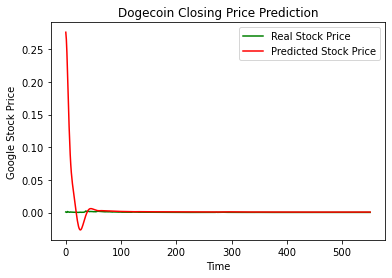

In [22]:
plot_predictions(real_stock_price, predicted_stock_price, "Dogecoin Closing Price Prediction", "Time", "Closing Price")

In [23]:
ds_test['Predicted_Close'] = predicted_stock_price
compare = ds_test[['Open','Close','Predicted_Close' ]]
compare.head(20)

<ipython-input-23-45dcbddaa3ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test['Predicted_Close'] = predicted_stock_price


,Open,Close,Predicted_Close
Date,,,
2013-12-16 23:59:59,0.000299,0.000205,0.275964
2013-12-17 23:59:59,0.000207,0.000269,0.265131
2013-12-18 23:59:59,0.000267,0.000362,0.245162
2013-12-19 23:59:59,0.000395,0.001162,0.218509
2013-12-20 23:59:59,0.001143,0.000704,0.188720
2013-12-21 23:59:59,0.000700,0.000394,0.159014
2013-12-22 23:59:59,0.000391,0.000315,0.131697
2013-12-23 23:59:59,0.000313,0.000451,0.108078
2013-12-24 23:59:59,0.000450,0.000686,0.088675


In [24]:
def buy_sell(op, cl):
  
  if cl > op:    
    return 1 
  else:
    return 0

compare["Buy(Actual)"] = list(map(buy_sell, compare['Open'], compare['Close']))
compare["Buy(Predicted)"] = list(map(buy_sell, compare['Open'], compare['Predicted_Close']))

compare.tail()

<ipython-input-24-cf998f1346ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Buy(Actual)"] = list(map(buy_sell, compare['Open'], compare['Close']))
<ipython-input-24-cf998f1346ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Buy(Predicted)"] = list(map(buy_sell, compare['Open'], compare['Predicted_Close']))


,Open,Close,Predicted_Close,Buy(Actual),Buy(Predicted)
Date,,,,,
2015-06-16 23:59:59,0.000170,0.000198,0.000723,1,1
2015-06-17 23:59:59,0.000197,0.000197,0.000725,1,1
2015-06-18 23:59:59,0.000197,0.000210,0.000729,1,1
2015-06-19 23:59:59,0.000213,0.000209,0.000734,0,1
2015-06-20 23:59:59,0.000207,0.000210,0.000740,1,1


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(compare['Buy(Actual)'], compare['Buy(Predicted)'])
Accuracy = cm.diagonal().sum()/cm.sum()
print("Buy or Sell Accuracy : ", Accuracy)

Buy or Sell Accuracy :  0.4221014492753623
